         date   open   high    low  close    volume Name
0  2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1  2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2  2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3  2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4  2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL


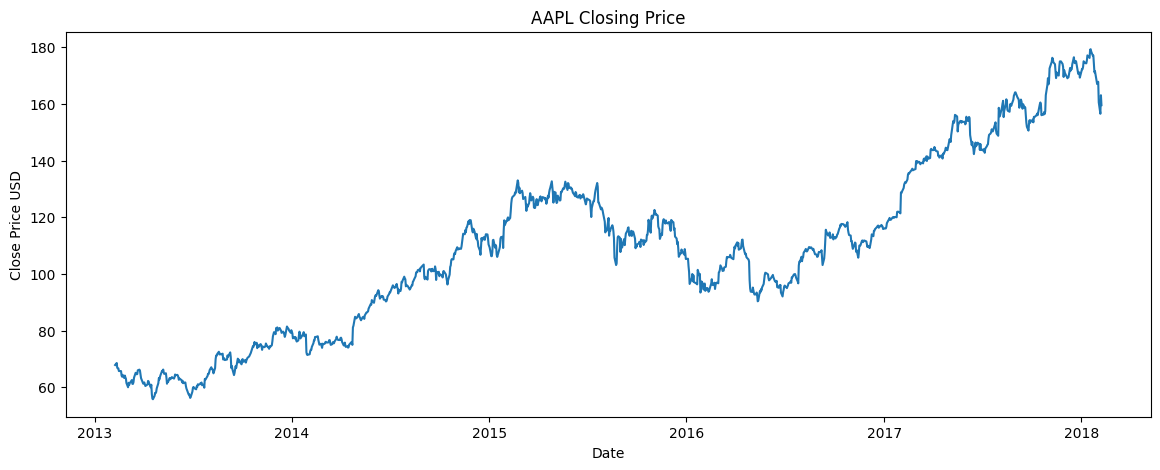

Input shape: (1199, 60, 5)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          11,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,451 (122.86 KB)

 Trainable params: 31,451 (122.86 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - loss: 0.0355 - val_loss: 0.0035
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.0031 - val_loss: 0.0046
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0019 - val_loss: 0.0012
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0018 - val_loss: 0.0026
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0018 - val_loss: 0.0025
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.0017 - val_loss: 9.7428e-04
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - los

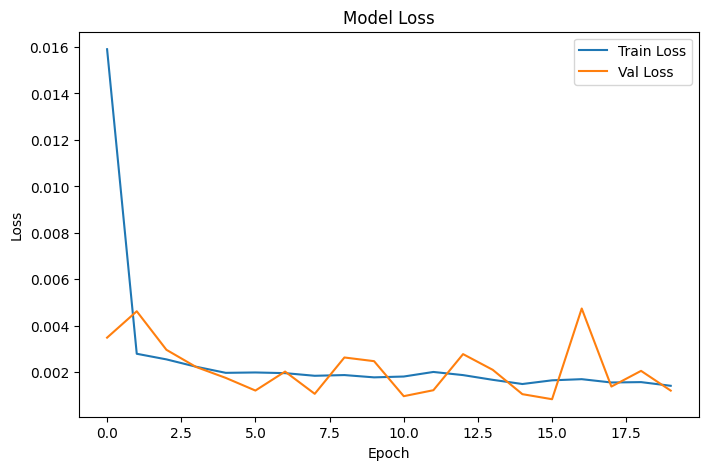

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step


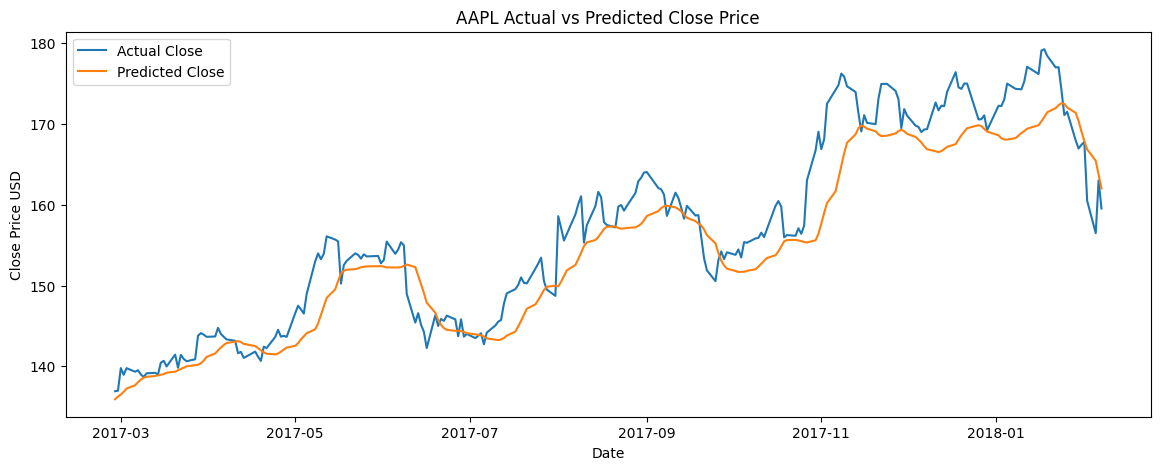

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras import Input
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
df = pd.read_csv("C:/Users/hp5cd/Downloads/all_stocks_5yr.csv")
print(df.head())
symbol = 'AAPL'
stock_df = df[df['Name'] == symbol].copy()
stock_df['date'] = pd.to_datetime(stock_df['date'])
stock_df.sort_values('date', inplace=True)
stock_df.reset_index(drop=True, inplace=True)
plt.figure(figsize=(14,5))
plt.plot(stock_df['date'], stock_df['close'])
plt.title(f'{symbol} Closing Price')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.show()
features = ['open', 'high', 'low', 'close', 'volume']
data = stock_df[features].values
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)
sequence_length = 60
x, y = [], []
for i in range(sequence_length, len(scaled_data)):
    x.append(scaled_data[i-sequence_length:i])
    y.append(scaled_data[i, features.index('close')])  
x = np.array(x)
y = np.array(y)
print("Input shape:", x.shape)
train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
model = Sequential([
    Input(shape=(x_train.shape[1], x_train.shape[2])),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(x_test, y_test)
)
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
predictions = model.predict(x_test)
full_pred = np.zeros((predictions.shape[0], data.shape[1]))
full_pred[:, features.index('close')] = predictions[:, 0]
full_y = np.zeros((y_test.shape[0], data.shape[1]))
full_y[:, features.index('close')] = y_test
pred_close = scaler.inverse_transform(full_pred)[:, features.index('close')]
real_close = scaler.inverse_transform(full_y)[:, features.index('close')]
plt.figure(figsize=(14,5))
plt.plot(stock_df['date'][-len(real_close):], real_close, label='Actual Close')
plt.plot(stock_df['date'][-len(pred_close):], pred_close, label='Predicted Close')
plt.title(f'{symbol} Actual vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.legend()
plt.show()
model.save('aapl_lstm_model.keras')